# Q-4

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import euclidean_distances

# Dataset-1

In [2]:
x = pd.read_csv(r'C:\Users\naman\Downloads\dataset1.txt', delimiter= '\s+', header=None)


In [3]:
x

,0,1
0,1.489034,-0.372265
1,-0.993560,0.113308
2,1.375386,-0.426868
3,-0.856408,0.516299
4,0.446398,-0.332782
...,...,...
495,0.199975,-0.099966
496,-0.760611,0.649208
497,1.856408,-0.016299
498,-0.169505,0.985529


# (a) K-means to find number of clusters

In [4]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(x)
  labels = kmeans.labels_
  sil.append(silhouette_score(x, labels, metric = 'euclidean'))

In [5]:
x_point = [x for x in range(2,11)]

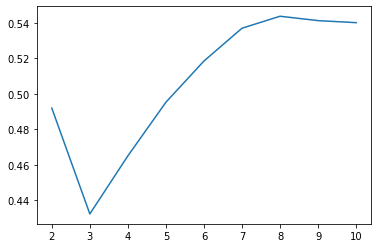

In [6]:
plt.plot(x_point, sil)

# Number of clusters = 3

In [7]:
Kmean = KMeans(n_clusters=3)
Kmean.fit(x)

KMeans(n_clusters=3)

In [8]:
centroids = Kmean.cluster_centers_

In [9]:
label = Kmean.fit_predict(x)

In [10]:
label

array([2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 2, 2, 1, 2, 1, 1, 1, 2, 0, 0, 2, 0,
       1, 2, 0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 1, 2, 2, 1, 2, 2, 0,
       0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 1, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 1,
       2, 1, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 1, 2, 0, 1, 0, 1, 0, 1,
       1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 2, 1, 0, 0, 2,
       1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 1,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 1,
       1, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 1, 0, 2, 1, 0, 1,
       0, 1, 0, 0, 2, 1, 2, 1, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 1, 0, 1, 0, 0,
       0, 2, 0, 1, 2, 2, 1, 0, 0, 1, 1, 2, 1, 0, 2,

In [11]:
x['label']=label

In [12]:
x

,0,1,label
0,1.489034,-0.372265,2
1,-0.993560,0.113308,1
2,1.375386,-0.426868,2
3,-0.856408,0.516299,1
4,0.446398,-0.332782,0
...,...,...,...
495,0.199975,-0.099966,0
496,-0.760611,0.649208,1
497,1.856408,-0.016299,2
498,-0.169505,0.985529,1


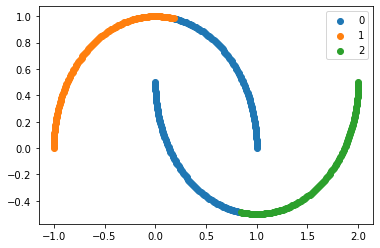

In [13]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(x[label == i][ 0] , x[label == i][ 1] , label = i)
plt.legend()
plt.show()

In [14]:
x = x.drop('label', axis = 1)

# (b) DBSCAN to plot the data points

In [15]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x[[0,1]])
distances, indices = nbrs.kneighbors(x[[0,1]])

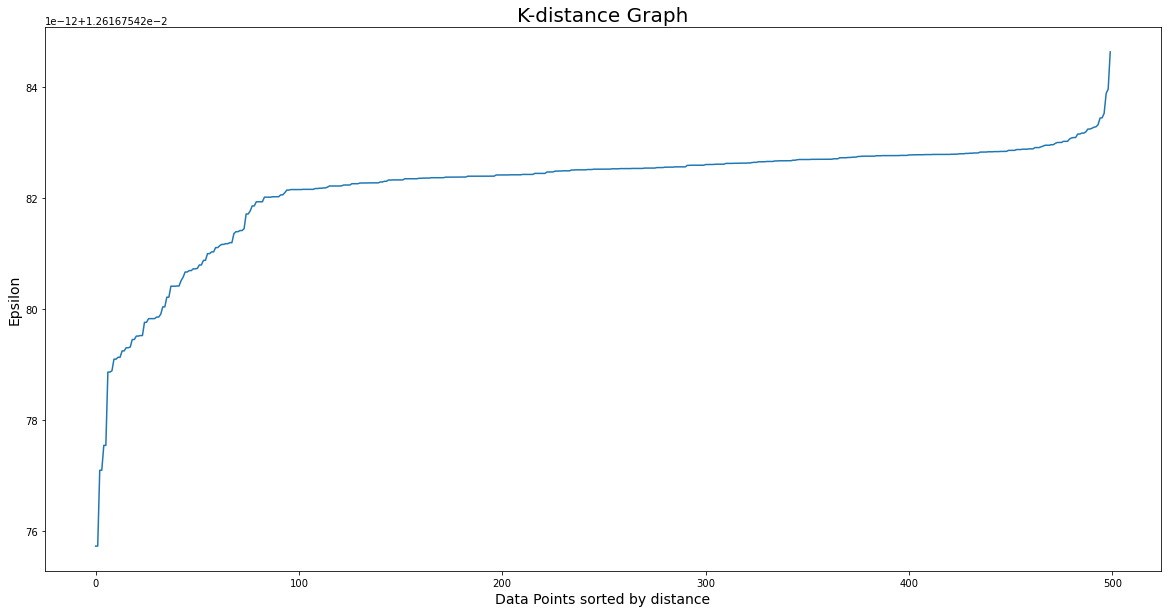

In [16]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [17]:
points_pair_distances = pd.DataFrame(euclidean_distances(x, x)) # calculating the euclidean distance between two points

In [18]:
points_pair_distances

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.000000,2.529635,0.126085,2.508116,1.043383,0.750773,0.656198,2.029558,1.028076,1.679400,...,1.569266,2.533922,2.516408,1.354604,2.348891,1.317505,2.470690,0.511542,2.143445,1.317246
1,2.529635,0.000000,2.429752,0.425691,1.507473,1.832038,1.992205,1.326972,1.912732,1.041161,...,1.037969,0.075683,0.376250,1.791648,0.888818,1.212440,0.584341,2.852914,1.199932,1.808147
2,0.126085,2.429752,0.000000,2.422906,0.933740,0.632415,0.618405,1.986197,1.013452,1.607589,...,1.487977,2.436426,2.429336,1.337571,2.283232,1.220024,2.391741,0.632415,2.093217,1.300949
3,2.508116,0.425691,2.422906,0.000000,1.555070,1.878404,1.909008,0.978068,1.744529,0.866630,...,0.940609,0.351437,0.050462,1.561413,0.487108,1.222999,0.163835,2.764604,0.831873,1.584785
4,1.043383,1.507473,0.933740,1.555070,0.000000,0.326569,0.678935,1.407550,0.908235,0.866143,...,0.691938,1.520552,1.552846,1.083376,1.529144,0.339010,1.556012,1.445091,1.455088,1.063945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.317505,1.212440,1.220024,1.222999,0.339010,0.656303,0.814514,1.119122,0.887329,0.548040,...,0.363851,1.216718,1.223495,0.958097,1.194229,0.000000,1.218190,1.658545,1.146654,0.949672
496,2.470690,0.584341,2.391741,0.163835,1.556012,1.873467,1.853737,0.831873,1.658545,0.800523,...,0.904070,0.511542,0.214075,1.453785,0.326569,1.218190,0.000000,2.700313,0.680087,1.479517
497,0.511542,2.852914,0.632415,2.764604,1.445091,1.199932,0.862056,2.121918,1.080437,1.901332,...,1.834204,2.845905,2.781053,1.379607,2.524157,1.658545,2.700313,0.000000,2.260085,1.342672
498,2.143445,1.199932,2.093217,0.831873,1.455088,1.715805,1.487977,0.163835,1.179650,0.599364,...,0.787457,1.138524,0.877498,0.900103,0.363851,1.146654,0.680087,2.260085,0.000000,0.933740


In [19]:
data_pts = x.shape[0]

[1 2]


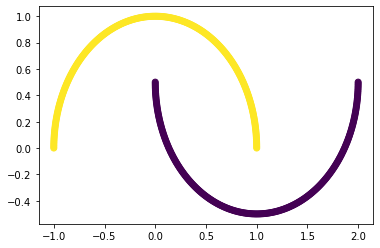

In [20]:
points_label = [-1]*data_pts # all points are initialized to cluster -1(it means cluster not assigned). Noise is points_labelled as cluster 0. 
seen = [0]*data_pts # flag to mark if the node is seen.

min_pts = 20 # minimum neighbors required to be a core point
eps = 0.16 # The maximum distance between two sample points for them to be considered as in the same neighborhood.
count = 0

for i in range(data_pts):
    if seen[i] == 0:
        seen[i] = 1 # mark seen
        friends = points_pair_distances[points_pair_distances[i] <  eps].index.tolist() # find neighbors
        if len(friends) -1 >= eps: # see if current point is a core point.
            count += 1
            points_label[i] = count
            for friend in friends:
                if friend != i: 
                    if seen[friend] == 0:
                        seen[friend] = 1
                        mutual_friends = points_pair_distances[points_pair_distances[friend] <  eps].index.tolist() 
                        if len(mutual_friends) -1 >= eps: # check if the neighbor is a core point
                            friends.extend(mutual_friends) # adding the neighbors of the core point to same cluster.
                        if points_label[friend] == -1:
                            points_label[friend] = count
        else:
            points_label[i] = 0 # classification for noise 
print(np.unique(points_label)) # ID's of all clusters identified
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c= points_label )

# Above is the plot of data points

In [21]:
x1 = pd.read_csv(r'C:\Users\naman\Downloads\dataset2.txt', delimiter= '\s+', header=None)

# (c) Difference between DBSCAN and K-means :
   -K-Means is the most widely-used centroid-based clustering algorithm. 
   -Centroid-based algorithms are efficient but sensitive to initial conditions and outliers, so due to this, we see the            differences.
   -While in case of DBSCAN which is a density-based method, clustering connects areas of high example density into clusters.
    This allows for arbitrary-shaped distributions as long as dense areas can be connected.

# (d)  Dataset 2

# K-means to find number of clusters

In [22]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(x1)
  labels = kmeans.labels_
  sil.append(silhouette_score(x1, labels, metric = 'euclidean'))

In [23]:
x_point = [x for x in range(2,11)]

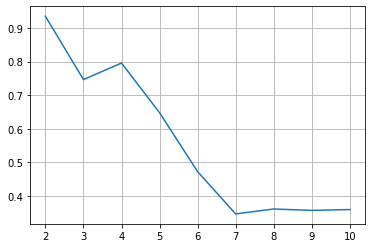

In [24]:
plt.plot(x_point, sil)
plt.grid()

In [25]:
Kmean = KMeans(n_clusters=3)
Kmean.fit(x1)

KMeans(n_clusters=3)

In [26]:
centroids = Kmean.cluster_centers_

In [27]:
label = Kmean.fit_predict(x1)

In [28]:
x1['label']=label

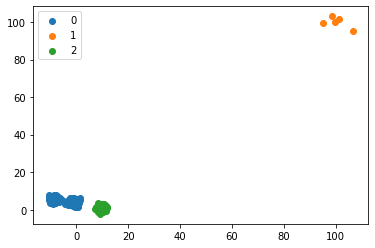

In [29]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(x1[label == i][ 0] , x1[label == i][ 1] , label = i)
plt.legend()
plt.show()

In [30]:
x1 = x1.drop('label', axis = 1)

# DBSCAN to plot points

In [31]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x1[[0,1]])
distances, indices = nbrs.kneighbors(x1[[0,1]])

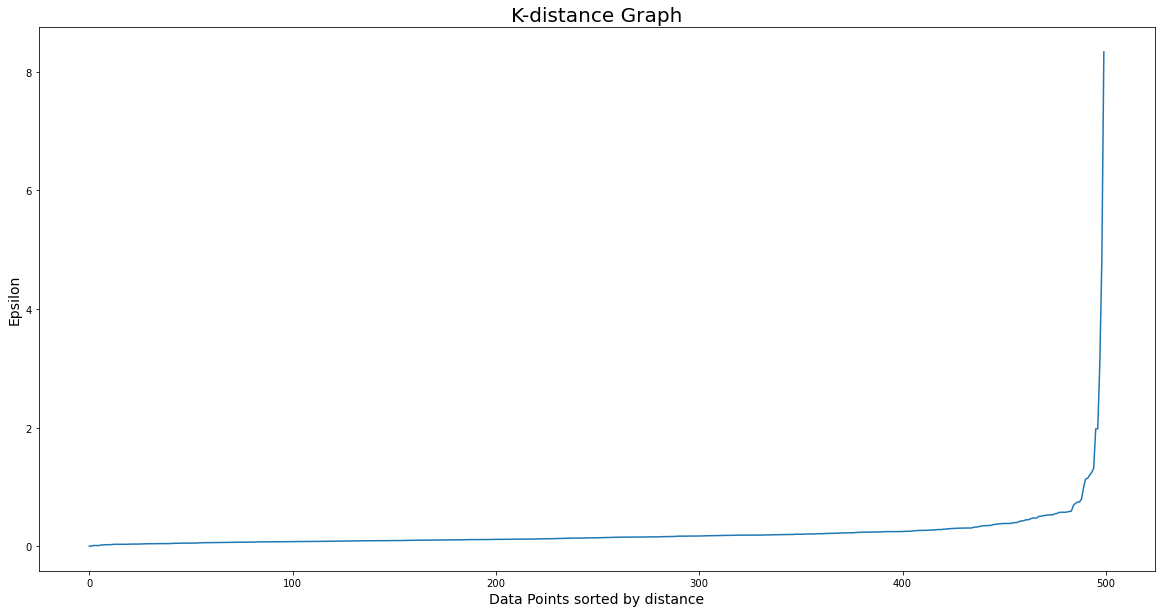

In [32]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [33]:
points_pair_distances = pd.DataFrame(euclidean_distances(x1, x1)) # calculating the euclidean distance between two points

In [34]:
data_pts = x1.shape[0]

[0 1 2]


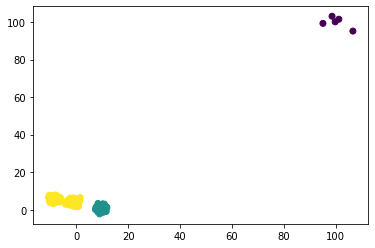

In [35]:
points_label = [-1]*data_pts # all points are initialized to cluster -1(it means cluster not assigned). Noise is points_labelled as cluster 0. 
seen = [0]*data_pts # flag to mark if the node is seen.

min_pts = 4 # minimum neighbors required to be a core point
eps = 3 # The maximum distance between two sample points for them to be considered as in the same neighborhood.
count = 0

for i in range(data_pts):
    if seen[i] == 0:
        seen[i] = 1 # mark seen
        friends = points_pair_distances[points_pair_distances[i] <  eps].index.tolist() # find neighbors
        if len(friends) -1 >= eps: # see if current point is a core point.
            count += 1
            points_label[i] = count
            for friend in friends:
                if friend != i: 
                    if seen[friend] == 0:
                        seen[friend] = 1
                        mutual_friends = points_pair_distances[points_pair_distances[friend] <  eps].index.tolist() 
                        if len(mutual_friends) -1 >= eps: # check if the neighbor is a core point
                            friends.extend(mutual_friends) # adding the neighbors of the core point to same cluster.
                        if points_label[friend] == -1:
                            points_label[friend] = count
        else:
            points_label[i] = 0 # classification for noise 
print(np.unique(points_label)) # ID's of all clusters identified
plt.scatter(x1.iloc[:, 0], x1.iloc[:, 1], c= points_label )

# (d)	Conclusions on pros and cons of using DBSCAN and K-Means: -
(i)	Advantages of DBSCAN: 
	-DBSCAN does not require one to clusters in the data, as opposed to k-means. 
	-DBSCAN find deformed-shaped clusters.
(ii)	Disadvantages of DBSCAN:
	-DBSCAN algorithm fails in case of varying density clusters.
	-Does not work well in case of high dimensional data.
    
(iii)	Advantages of K-Means: 
	-Relatively simple to implement. 
	-Scales to large data sets.
	-Can be initialised using Initial values
(iv)	Disadvantages of K-Means: 
	-Difficult to predict K-Value.
	-K-Means produce tighter clusters, when the clusters are blob like.
	-Scaling with a Number of Dimensions.  As the number of dimensions increases, a distance-based similarity measure converges
    to a constant value between any given examples. 
    -Reduce dimensionality either by using PCA on the feature data or by using “spectral clustering” to modify the clustering
    algorithm.